In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv
/kaggle/input/data_description.txt
/kaggle/input/sample_submission.csv
/kaggle/input/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [3]:
raw_train=pd.read_csv('/kaggle/input/train.csv')
raw_test=pd.read_csv('/kaggle/input/test.csv')

In [4]:
from IPython.display import display
print('shape of train set',raw_train.shape)
display(raw_train.head(1))

shape of train set (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [5]:
print('shape of test set',raw_test.shape)
display(raw_test.head(1))

shape of test set (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [6]:
raw_train=raw_train.drop(['Id'],axis=1)
raw_test=raw_test.drop(['Id'],axis=1)

outliers=[]
def detect_outlier(data_1):
    
    threshold=8
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

#### Changing different threshold values in above function some (or) one influential points may be observed

outlier_datapoints = detect_outlier(raw_train['MasVnrArea'])
print("number of outliers in MasVnrArea=",len(outlier_datapoints))
print('those data points are',outlier_datapoints)

train: (1,)
test: (0,)


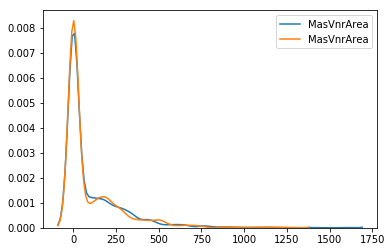

In [7]:
sns.kdeplot(raw_train['MasVnrArea'])
sns.kdeplot(raw_test['MasVnrArea'])
print('train:', raw_train['MasVnrArea'][raw_train['MasVnrArea'] > 1500].shape)
print('test:', raw_test['MasVnrArea'][raw_test['MasVnrArea'] > 1500].shape)

In [8]:
print(raw_train.shape)
raw_train.drop(raw_train[raw_train["LotFrontage"] > 200].index,inplace=True)
raw_train.drop(raw_train[raw_train["LotArea"] > 70000].index,inplace=True)
raw_train.drop(raw_train[raw_train["MasVnrArea"] > 1500].index,inplace=True)
print(raw_train.shape)
train_length = raw_train.shape[0]
salesprice=raw_train['SalePrice']

(1460, 80)
(1452, 80)


In [9]:
raw_train=raw_train.drop(['SalePrice'],axis=1)

In [10]:
whole_data = pd.concat([raw_train, raw_test])
display(whole_data.head(1))
print(whole_data.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


(2911, 79)


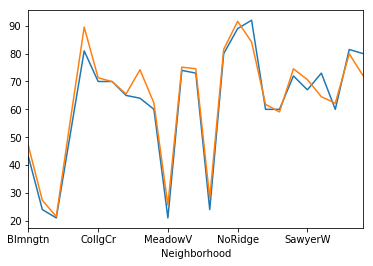

In [11]:
whole_data['LotFrontage'].groupby(whole_data["Neighborhood"]).median().plot()
whole_data['LotFrontage'].groupby(whole_data["Neighborhood"]).mean().plot()

In [12]:
median_values = whole_data['LotFrontage'].groupby(whole_data["Neighborhood"]).median()    
rows = whole_data['LotFrontage'].isnull()
whole_data['LotFrontage'][rows] = whole_data['Neighborhood'][rows].map(lambda neighbor : median_values[neighbor])

In [13]:
def fill_nas(column, value):
    whole_data.loc[whole_data[column].isnull(),column] = value

In [14]:
fill_nas('Alley', 'NA')
#NA--> No Alley case

In [15]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [16]:
# Values for missing values is filled with NA
#NA--> No Basement
for column in basement_cols:
        fill_nas(column, 'NA')

In [17]:
whole_data['MasVnrType'].fillna('None', inplace=True)
whole_data['MasVnrArea'].fillna(0, inplace=True)
# None--> No masonry veneer

In [18]:
fill_nas('BsmtFinSF1', 0)
fill_nas('BsmtFinSF2', 0)

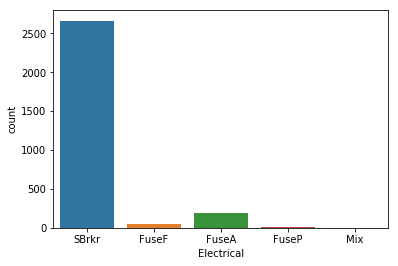

In [19]:
sns.countplot(whole_data['Electrical'])

In [20]:
fill_nas('Electrical','SBrkr')

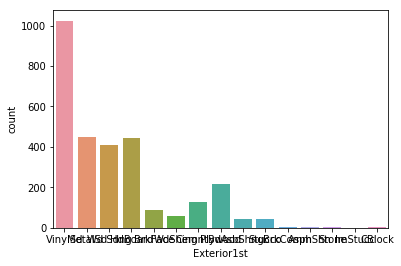

In [21]:
sns.countplot(whole_data['Exterior1st'])

In [22]:
fill_nas('Exterior1st','VinylSd')

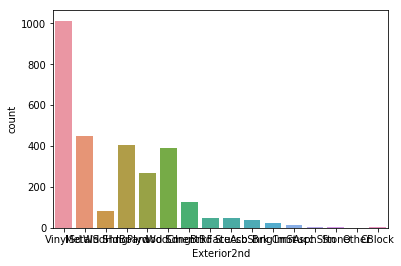

In [23]:
sns.countplot(whole_data['Exterior2nd'])

In [24]:
fill_nas('Exterior2nd','VinylSd')

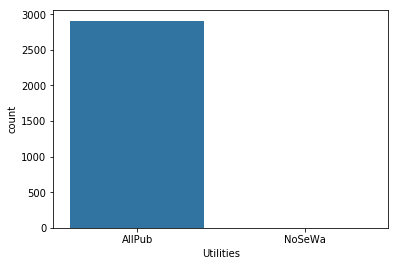

In [25]:
sns.countplot(whole_data['Utilities'])

In [26]:
fill_nas('Utilities','AllPub')

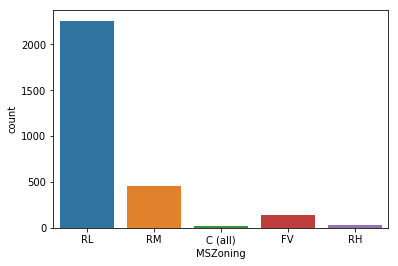

In [27]:
sns.countplot(whole_data['MSZoning'])

In [28]:
fill_nas('MSZoning','RL')

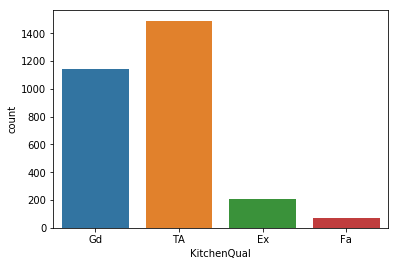

In [29]:
sns.countplot(whole_data['KitchenQual'])

In [30]:
fill_nas('KitchenQual','Gd')

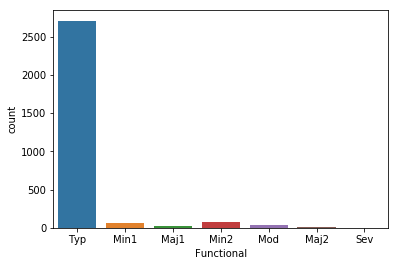

In [31]:
sns.countplot(whole_data['Functional'])

In [32]:
fill_nas('Functional','Typ')

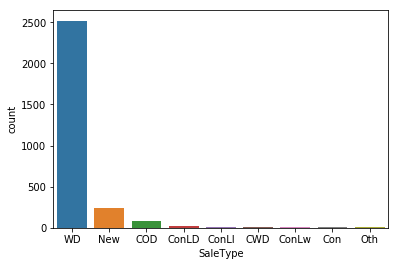

In [33]:
sns.countplot(whole_data['SaleType'])

In [34]:
fill_nas('SaleType','WD')

In [35]:
fill_nas('FireplaceQu', 'NA')
#NA--> NO Fireplace
fill_nas('PoolQC', 'NA')
#NA--> NO Pool
fill_nas('MiscFeature', 'NA')
#NA--> None
fill_nas('Fence', 'NA')
#NA--> No Fence

In [36]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
whole_data[garage_cols][whole_data['GarageType'].isnull()==True].head(1)

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [37]:
for column in garage_cols:
    if column != 'GarageCars' and column != 'GarageArea':
        # NA	No Basement
        fill_nas(column, 'NA')
    else:
        fill_nas(column, 0)

In [38]:
#Almost every column got filled it's NA with some values. Let's check if there are any other columns
print('These are the columns remaining with missing values',whole_data.columns[whole_data.isnull().any()].tolist())

These are the columns remaining with missing values ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


In [39]:
remaining_cols=['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in remaining_cols:
    fill_nas(col,0)

In [40]:
# How many years has remodeled from built
whole_data['RemodYears'] = whole_data['YearRemodAdd'] - whole_data['YearBuilt']
# Did a remodeling happened from built?
whole_data["HasRemodeled"] = (whole_data["YearRemodAdd"] != whole_data["YearBuilt"]) * 1
# Did a remodeling happen in the year the house was sold?
whole_data["HasRemodel@sold"] = (whole_data["YearRemodAdd"] == whole_data["YrSold"]) * 1
#1--> Yes, 0--> NO

In [41]:
whole_data["SimplOverallQual"] = whole_data.OverallQual.replace(
                                                            {1 : 1, 2 : 1, 3 : 1, # bad
                                                             4 : 2, 5 : 2, 6 : 2, # average
                                                             7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                            })
whole_data["SimplOverallCond"] = whole_data.OverallCond.replace(
                                                            {1 : 1, 2 : 1, 3 : 1, # bad
                                                             4 : 2, 5 : 2, 6 : 2, # average
                                                             7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                             })

In [42]:
labelling_map = {'Street': {'Grvl': 0, 'Pave': 1},
     'Alley': {'NA':0, 'Grvl': 1, 'Pave': 2},
     'Utilities': {'AllPub':3, 'NoSeWa': 1, 'NoSewr': 2, 'ELO': 0},
     'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,'NA': 0},
     'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,'NA': 0},
     'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,'NA': 0},
     'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
     'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
     'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'CentralAir': {'N':0, 'Y':1},
     'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
     'Functional': {'Typ':0,'Min1':1,'Min2':1,'Mod':2,'Maj1':3,'Maj2':4,'Sev':5,'Sal': 6},
     'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
     'Fence': {'GdPrv': 2, 'GdWo': 2, 'MnPrv': 1, 'MnWw': 1, 'NA': 0}
    }

print(labelling_map.keys())
labelled_data = whole_data[labelling_map.keys()].replace(labelling_map)
labelled_data.columns = labelled_data.columns.map(lambda m : m + '_')
whole_data[labelled_data.columns] = labelled_data[labelled_data.columns]
print(whole_data.shape)

dict_keys(['Street', 'Alley', 'Utilities', 'ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'])
(2911, 103)


In [43]:
whole_data=whole_data.drop(['Street', 'Alley', 'Utilities', 'ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],axis=1)

In [44]:
whole_data.shape

(2911, 84)

In [45]:
whole_data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFinType2_,HeatingQC_,CentralAir_,KitchenQual_,Functional_,FireplaceQu_,GarageQual_,GarageCond_,PoolQC_,Fence_
count,2911.000000,2911,2911.000000,2911.000000,2911,2911,2911,2911,2911,2911,...,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000
unique,NaN,5,NaN,NaN,4,4,5,3,25,9,...,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,NaN
top,NaN,RL,NaN,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,2262,NaN,NaN,1859,2621,2129,2776,442,2505,...,NaN,NaN,NaN,1490.0,2711.0,NaN,NaN,NaN,NaN,NaN
mean,57.143593,NaN,69.344899,9913.079354,NaN,NaN,NaN,NaN,NaN,NaN,...,1.272759,3.151838,0.932669,NaN,NaN,1.763312,2.800412,2.808313,0.009275,0.275163
std,42.482153,NaN,20.717493,5088.809890,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954539,0.958035,0.250637,NaN,NaN,1.806624,0.716770,0.713406,0.178529,0.597990
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,60.000000,7474.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,1.000000,NaN,NaN,0.000000,3.000000,3.000000,0.000000,0.000000
50%,50.000000,NaN,70.000000,9450.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,4.000000,1.000000,NaN,NaN,1.000000,3.000000,3.000000,0.000000,0.000000
75%,70.000000,NaN,80.000000,11523.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,4.000000,1.000000,NaN,NaN,4.000000,3.000000,3.000000,0.000000,0.000000


In [46]:
whole_data.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
LotShape         object
                 ...   
FireplaceQu_      int64
GarageQual_       int64
GarageCond_       int64
PoolQC_           int64
Fence_            int64
Length: 84, dtype: object

In [47]:
cat_attr = whole_data.select_dtypes(exclude=['float64','int64']).columns
num_attr = whole_data.select_dtypes(include=['float64','int64']).columns

In [48]:
whole_data[cat_attr]=whole_data[cat_attr].astype('category')

In [49]:
whole_data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFinType2_,HeatingQC_,CentralAir_,KitchenQual_,Functional_,FireplaceQu_,GarageQual_,GarageCond_,PoolQC_,Fence_
count,2911.000000,2911,2911.000000,2911.000000,2911,2911,2911,2911,2911,2911,...,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000
unique,NaN,5,NaN,NaN,4,4,5,3,25,9,...,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,NaN
top,NaN,RL,NaN,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,2262,NaN,NaN,1859,2621,2129,2776,442,2505,...,NaN,NaN,NaN,1490.0,2711.0,NaN,NaN,NaN,NaN,NaN
mean,57.143593,NaN,69.344899,9913.079354,NaN,NaN,NaN,NaN,NaN,NaN,...,1.272759,3.151838,0.932669,NaN,NaN,1.763312,2.800412,2.808313,0.009275,0.275163
std,42.482153,NaN,20.717493,5088.809890,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954539,0.958035,0.250637,NaN,NaN,1.806624,0.716770,0.713406,0.178529,0.597990
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,60.000000,7474.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,1.000000,NaN,NaN,0.000000,3.000000,3.000000,0.000000,0.000000
50%,50.000000,NaN,70.000000,9450.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,4.000000,1.000000,NaN,NaN,1.000000,3.000000,3.000000,0.000000,0.000000
75%,70.000000,NaN,80.000000,11523.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,4.000000,1.000000,NaN,NaN,4.000000,3.000000,3.000000,0.000000,0.000000


In [50]:
whole_data.dtypes

MSSubClass         int64
MSZoning        category
LotFrontage      float64
LotArea            int64
LotShape        category
                  ...   
FireplaceQu_       int64
GarageQual_        int64
GarageCond_        int64
PoolQC_            int64
Fence_             int64
Length: 84, dtype: object

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(whole_data[num_attr])
whole_data[num_attr]=scaler.transform(whole_data[num_attr])

In [52]:
whole_data = pd.get_dummies(columns = cat_attr,data = whole_data,drop_first = True)

In [53]:
train = whole_data.iloc[:train_length, :]
test= whole_data.iloc[train_length:,:]

In [54]:
print('the shape of the train after preprocessing ',train.shape)
print('the shape of the test after preprocessing ',test.shape)

the shape of the train after preprocessing  (1452, 321)
the shape of the test after preprocessing  (1459, 321)


In [55]:
from sklearn.model_selection import train_test_split
X =train
y = salesprice
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=123)

In [56]:
print(X_train.shape)
print(y_train.shape)

(1161, 321)
(1161,)


In [57]:
type(X_val)

pandas.core.frame.DataFrame

In [58]:
y_train.head()

998      91000
689     194700
78      136500
5       143000
1362    104900
Name: SalePrice, dtype: int64

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rf= RandomForestRegressor(random_state = 8)

In [60]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 8, 'verbose': 0, 'warm_start': False}


In [61]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score
def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

In [63]:
# First create the base model to tune
rfc = RandomForestRegressor(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring=two_scorer(),
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSE: 967285223.007
R2: 0.843
MSE: 795526826.475
R2: 0.839
MSE: 1361575514.923
R2: 0.813
MSE: 946257988.423
R2: 0.846
MSE: 760581189.670
R2: 0.846
MSE: 1286810715.890
R2: 0.824
MSE: 1003581380.243
R2: 0.837
MSE: 793046455.468
R2: 0.840
MSE: 1499027035.381
R2: 0.795
MSE: 894848535.378
R2: 0.855
MSE: 788082008.892
R2: 0.841
MSE: 1147039605.124
R2: 0.843
MSE: 962881259.040
R2: 0.844
MSE: 951440734.353
R2: 0.807
MSE: 1062025528.857
R2: 0.854
MSE: 928991679.393
R2: 0.849
MSE: 791834631.033
R2: 0.840
MSE: 1322590548.629
R2: 0.819
MSE: 965124149.188
R2: 0.843
MSE: 795545016.635
R2: 0.839
MSE: 1495803833.867
R2: 0.795
MSE: 974211532.732
R2: 0.842
MSE: 798664350.451
R2: 0.838
MSE: 1383473933.073
R2: 0.810
MSE: 1044531778.929
R2: 0.830
MSE: 804279200.592
R2: 0.837
MSE: 1526356447.551
R2: 0.791
MSE: 1653106876.767
R2: 0.731
MSE: 1673034914.256
R2: 0.661
MSE: 1864114637.513
R2: 0.745
MSE: 1011906113.693
R2: 0.836
MSE: 929406053.529
R2: 0.812
MSE: 1144128403.890
R2: 0.843
MSE: 1358800225.481
R2: 0.7

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 13.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [64]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The best R-square of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

The best R-square of a model with these hyperparameters is:
0.8459818026979666


In [65]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [75,100,125]
max_features = ['sqrt']
min_samples_leaf = [1,2,3]
min_samples_split = [2,3,4]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}


# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring=two_scorer(),
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSE: 875781653.359
R2: 0.852
MSE: 559255856.494
R2: 0.892
MSE: 834604872.544
R2: 0.859
MSE: 880714424.338
R2: 0.851
MSE: 563852666.258
R2: 0.891
MSE: 843726310.601
R2: 0.858
MSE: 865466254.234
R2: 0.853
MSE: 565067666.454
R2: 0.891
MSE: 847870496.957
R2: 0.857
MSE: 912863646.995
R2: 0.845
MSE: 612237891.009
R2: 0.882
MSE: 862726442.984
R2: 0.854
MSE: 912863646.995
R2: 0.845
MSE: 612237891.009
R2: 0.882
MSE: 862726442.984
R2: 0.854
MSE: 912863646.995
R2: 0.845
MSE: 612237891.009
R2: 0.882
MSE: 862726442.984
R2: 0.854
MSE: 1013669059.537
R2: 0.828
MSE: 636382384.019
R2: 0.877
MSE: 899618778.399
R2: 0.848
MSE: 1013669059.537
R2: 0.828
MSE: 636382384.019
R2: 0.877
MSE: 899618778.399
R2: 0.848
MSE: 1013669059.537
R2: 0.828
MSE: 636382384.019
R2: 0.877
MSE: 899618778.399
R2: 0.848
MSE: 875781653.359
R2: 0.852
MSE: 559255856.494
R2: 0.892
MSE: 834604872.544
R2: 0.859
MSE: 880714424.338
R2: 0.851
MSE: 563852666.258
R2: 0.891
MSE: 843726310.601
R2: 0.858
MSE: 865466254.234
R2: 0.853
MSE: 565067

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  3.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf...
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=8,
                                             verbose=0, warm_start=False),
             i

In [66]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The best R-square of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}

The best R-square of a model with these hyperparameters is:
0.8677096269456144


In [67]:
best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=75,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=8, verbose=0,
                      warm_start=False)

In [68]:
pred_train_rf=best_rfc.predict(X_train)
pred_test_rf=best_rfc.predict(X_val)

In [69]:
print("The training score is: ")
print(r2_score(y_train, pred_train_rf))
print('')
print("The test score is: ")
print(r2_score(y_val, pred_test_rf))

The training score is: 
0.999999995640281

The test score is: 
0.886591908919807


In [70]:
best_rgd = random_search.best_estimator_
best_rgd.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=40,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=8, verbose=0,
                      warm_start=False)

In [71]:
pred_train_rgd=best_rgd.predict(X_train)
pred_test_rgd=best_rgd.predict(X_val)

In [72]:
print("The training score is: ")
print(r2_score(y_train, pred_train_rgd))
print('')
print("The test score is: ")
print(r2_score(y_val, pred_test_rgd))

The training score is: 
0.9999999928230746

The test score is: 
0.8867739712016471


plt.title('Feature Importances for Random Forest Model')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

In [73]:
import tensorflow as tf
learning_rate = 0.01
#training_epochs = 1000
#display_step = 30
#n_samples=X_train.shape[0]

In [74]:
y_train=np.asarray(y_train).reshape(1161,1)

In [75]:
n=321
# Placeholder that is fed input data.
x = tf.placeholder(tf.float32, [None, n], "X_in")

# The model: we assume y = X_in * w + b
w = tf.Variable(tf.random_normal([n, 1]), name="w")
b = tf.Variable(tf.constant(1.0,shape=[]), name="b")
h = tf.add(tf.matmul(x, w), b, name="h")

# Placeholder that is fed observed results.
Y = tf.placeholder(tf.float32, [None, 1], "y_in")

# The loss function: we are minimizing square root of mean 
loss_op = tf.reduce_mean(tf.square(tf.subtract(Y, h)), name="loss")
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(train_op, feed_dict={
          x: np.asarray(X_train), 
          Y: np.asarray(y_train)
        })
    w_computed = sess.run(w)
    b_computed = sess.run(b)

w_computed=pd.DataFrame(w_computed)
b_computed=pd.DataFrame(columns=[b_computed])

In [76]:
X_tra=np.asarray(X_train)
print('The shape of input matrix')
print(X_tra.shape)
print('The shape of weight matrix')
print(w_computed.shape)

The shape of input matrix
(1161, 321)
The shape of weight matrix
(321, 1)


In [77]:
result_tf = [[sum(a * b for a, b in zip(A_row, B_col))  
                        for B_col in zip(*w_computed)] 
                                for A_row in X_tra] 

y_pred_tf= [x + b_computed for x in result_tf]

y_pred_tf=pd.DataFrame(y_pred_tf)

print("The training MSE score is: ")
print(MSE(y_train, y_pred_tf))

The training MSE score is: 
MSE: 38190697245.979
38190697245.9793


In [78]:
X_valid=np.asarray(X_val)
print('The shape of input matrix')
print(X_valid.shape)
print('The shape of weight matrix')
print(w_computed.shape)

The shape of input matrix
(291, 321)
The shape of weight matrix
(321, 1)


In [79]:
result_val_tf = [[sum(a * b for a, b in zip(A_row, B_col))  
                        for B_col in zip(*w_computed)] 
                                for A_row in X_valid] 

y_pred_val_tf= [x + b_computed for x in result_val_tf]

y_pred_val_tf=pd.DataFrame(y_pred_val_tf)

print("The validation MSE score is: ")
print(MSE(y_val, y_pred_val_tf))

The validation MSE score is: 
MSE: 40347027337.633
40347027337.63315


#Dimensionality Reduction using Linear Auto Encoders

In [80]:
from tensorflow.contrib.layers import fully_connected
num_inputs=321
num_hidden=100
num_outputs=num_inputs
learning_rate=0.01

In [81]:
x=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [82]:
hidden=fully_connected(x,num_hidden,activation_fn=None)
outputs=fully_connected(hidden,num_outputs,activation_fn=None)

In [83]:
loss=tf.reduce_mean(tf.square(outputs-x))

In [84]:
optimizer=tf.train.AdamOptimizer(learning_rate)
trainer=optimizer.minimize(loss)

In [85]:
init=tf.global_variables_initializer()

In [86]:
num_steps=1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(trainer,feed_dict={x:X})
        
    output_100d=hidden.eval(feed_dict={x:X})

In [87]:
X_train_ae, X_val_ae, y_train_ae, y_val_ae = train_test_split(output_100d, y, test_size=0.20,random_state=123)

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [89]:
moodel=lr.fit(X_train_ae,y_train_ae)

In [90]:
y_pred_lr=lr.predict(X_train_ae)
r2_score(y_pred_lr,y_train_ae)

0.8771563298792842

In [91]:
y_pred_test_lr=lr.predict(X_val_ae)
r2_score(y_pred_test_lr,y_val_ae)

0.8846415314239603